In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [4]:
data.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [5]:
data.dropna(inplace=True)

In [6]:
data.head()

,date,open,high,low,close,adj_close,volume
0,2009-02-13 00:00:00-05:00,2.10,2.25,2.10,2.20,2.139941,55600
1,2009-02-17 00:00:00-05:00,2.06,2.10,2.00,2.10,2.042671,72100
2,2009-02-18 00:00:00-05:00,2.15,2.30,2.15,2.30,2.237211,36200
3,2009-02-19 00:00:00-05:00,2.25,2.25,2.11,2.20,2.139941,102400
4,2009-02-20 00:00:00-05:00,2.05,2.05,1.95,2.05,1.994036,78200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       4046 non-null   object 
 1   open       4046 non-null   float64
 2   high       4046 non-null   float64
 3   low        4046 non-null   float64
 4   close      4046 non-null   float64
 5   adj_close  4046 non-null   float64
 6   volume     4046 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 221.4+ KB


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.describe()

,open,high,low,close,adj_close,volume
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4.046000e+03
mean,12.307059,12.501636,12.126453,12.316480,12.086099,1.734276e+05
std,11.480599,11.703862,11.281586,11.491057,11.350361,2.407044e+05
min,1.490000,1.490000,1.460000,1.470000,1.429870,2.200000e+03
25%,4.860000,4.900000,4.820000,4.880000,4.748638,5.280000e+04
50%,6.300000,6.360000,6.250000,6.310000,6.146232,9.970000e+04
75%,23.377500,23.735000,23.007500,23.402500,22.942532,1.983250e+05
max,50.700001,52.000000,50.330002,51.369999,51.369999,4.051800e+06


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include='number'))
scaled_data= pd.DataFrame(scaled_data, columns=data.select_dtypes(include='number').columns)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.drop('close', axis=1)
y = data['close']
X_numerical = X.select_dtypes(include=np.number)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.010960776413691852
Root Mean Squared Error: 0.10469372671603515
R-squared: 0.9999133080200492


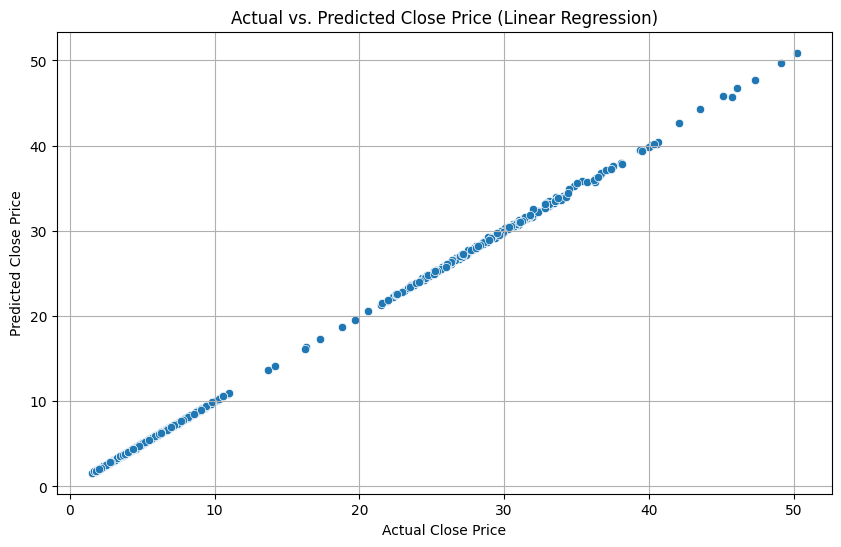

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (Linear Regression)")
plt.grid(True)
plt.show()

Model Coefficients:


,Feature,Coefficient
3,adj_close,7.443260
2,low,2.910070
1,high,1.976646
0,open,-0.837850
4,volume,0.010491


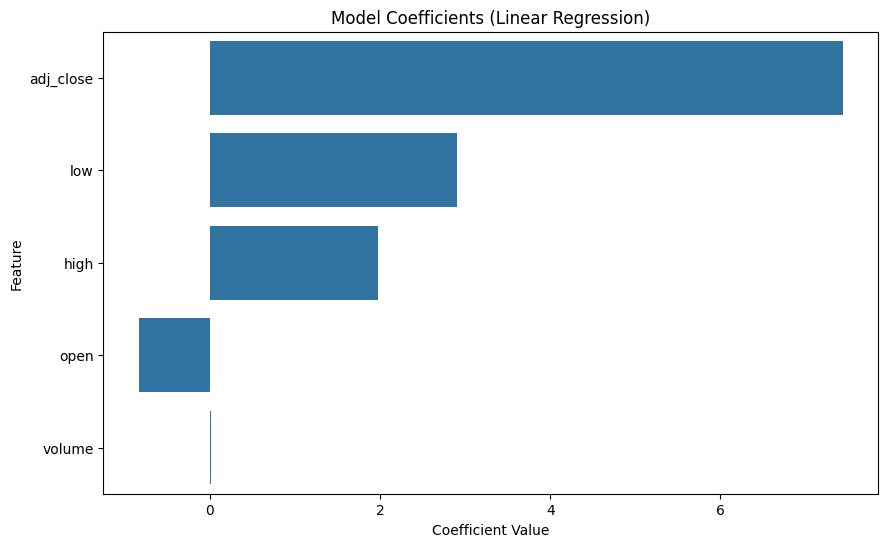

In [14]:
coefficients = model.coef_
feature_names = X_numerical.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
print("Model Coefficients:")
display(coefficients_df[['Feature', 'Coefficient']])
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients_df, x='Coefficient', y='Feature')
plt.title('Model Coefficients (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [15]:
data.to_csv('cleaned_data.csv', index=False)

In [16]:
!pip install plotly

In [17]:
import plotly.express as px

fig = px.line(data, y='open', title='Open Price Over Time')
fig.show()

In [18]:
fig = px.bar(data, y='open', title='Bar Chart of Open')
fig.show()